# Домашняя работа по регуляризации и оптимизации

Ниже приводится корпус данных с двумя метками: 1 и -1. К данным применяется линейная модель классификации:

$f(x, \theta) = x_1 \theta_1 + x_2 \theta_2 + \theta_3.$

Предлагается подобрать параметры $\theta$ минимизируя следующую функцию ошибки:

$\mathcal{L}(\theta) = 0.1 \|\theta\|^2 + \frac{1}{N}\sum\limits_{i=1}^N \max(0, 1 - y_i f(x_i, \theta)).$

Для оптимизации предлагается использовать метод градиентного спуска с 1000 шагами размера $0.1$ из начальной точки $(1, 1, 0)$.

###Импортируем модули

In [ ]:
import numpy as np
import yaml as ym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

###Вводим входные данные
При этом для удобства юзаем $x_3 = 1$, так как это не меняет ответ.

In [ ]:
X = np.array([[0, 1, 1],
              [1, 1, 1],
              [1, 0, 1],
              [-0.5, 0.5, 1],
              [0, -0.5, 1]], dtype='float64')
Y = np.array([1, 1, 1, -1, -1], dtype='float64')
theta = np.array([1.0, 1.0, 0.0], dtype='float64')

###Строим функцию 

In [ ]:
def f(x, theta):
    return x[0]*theta[0] + x[1]*theta[1] + x[2]*theta[2]

###Строим функцию ошибки и считаем ее

In [ ]:
def loss(X, Y, theta):
  N = len(X)
  arr_of_maxx = np.array([max(0, 1 - Y[i] * f(X[i], theta)) for i in range(N)])
  norm = (1/N) * np.sum(arr_of_maxx)
  return 0.1 * np.linalg.norm(theta)**2 + norm

print("Prediction:", [f(X[i], theta) for i in range(5)])
print("Loss:", loss(X, Y, theta))

### Считаем градиент лосса
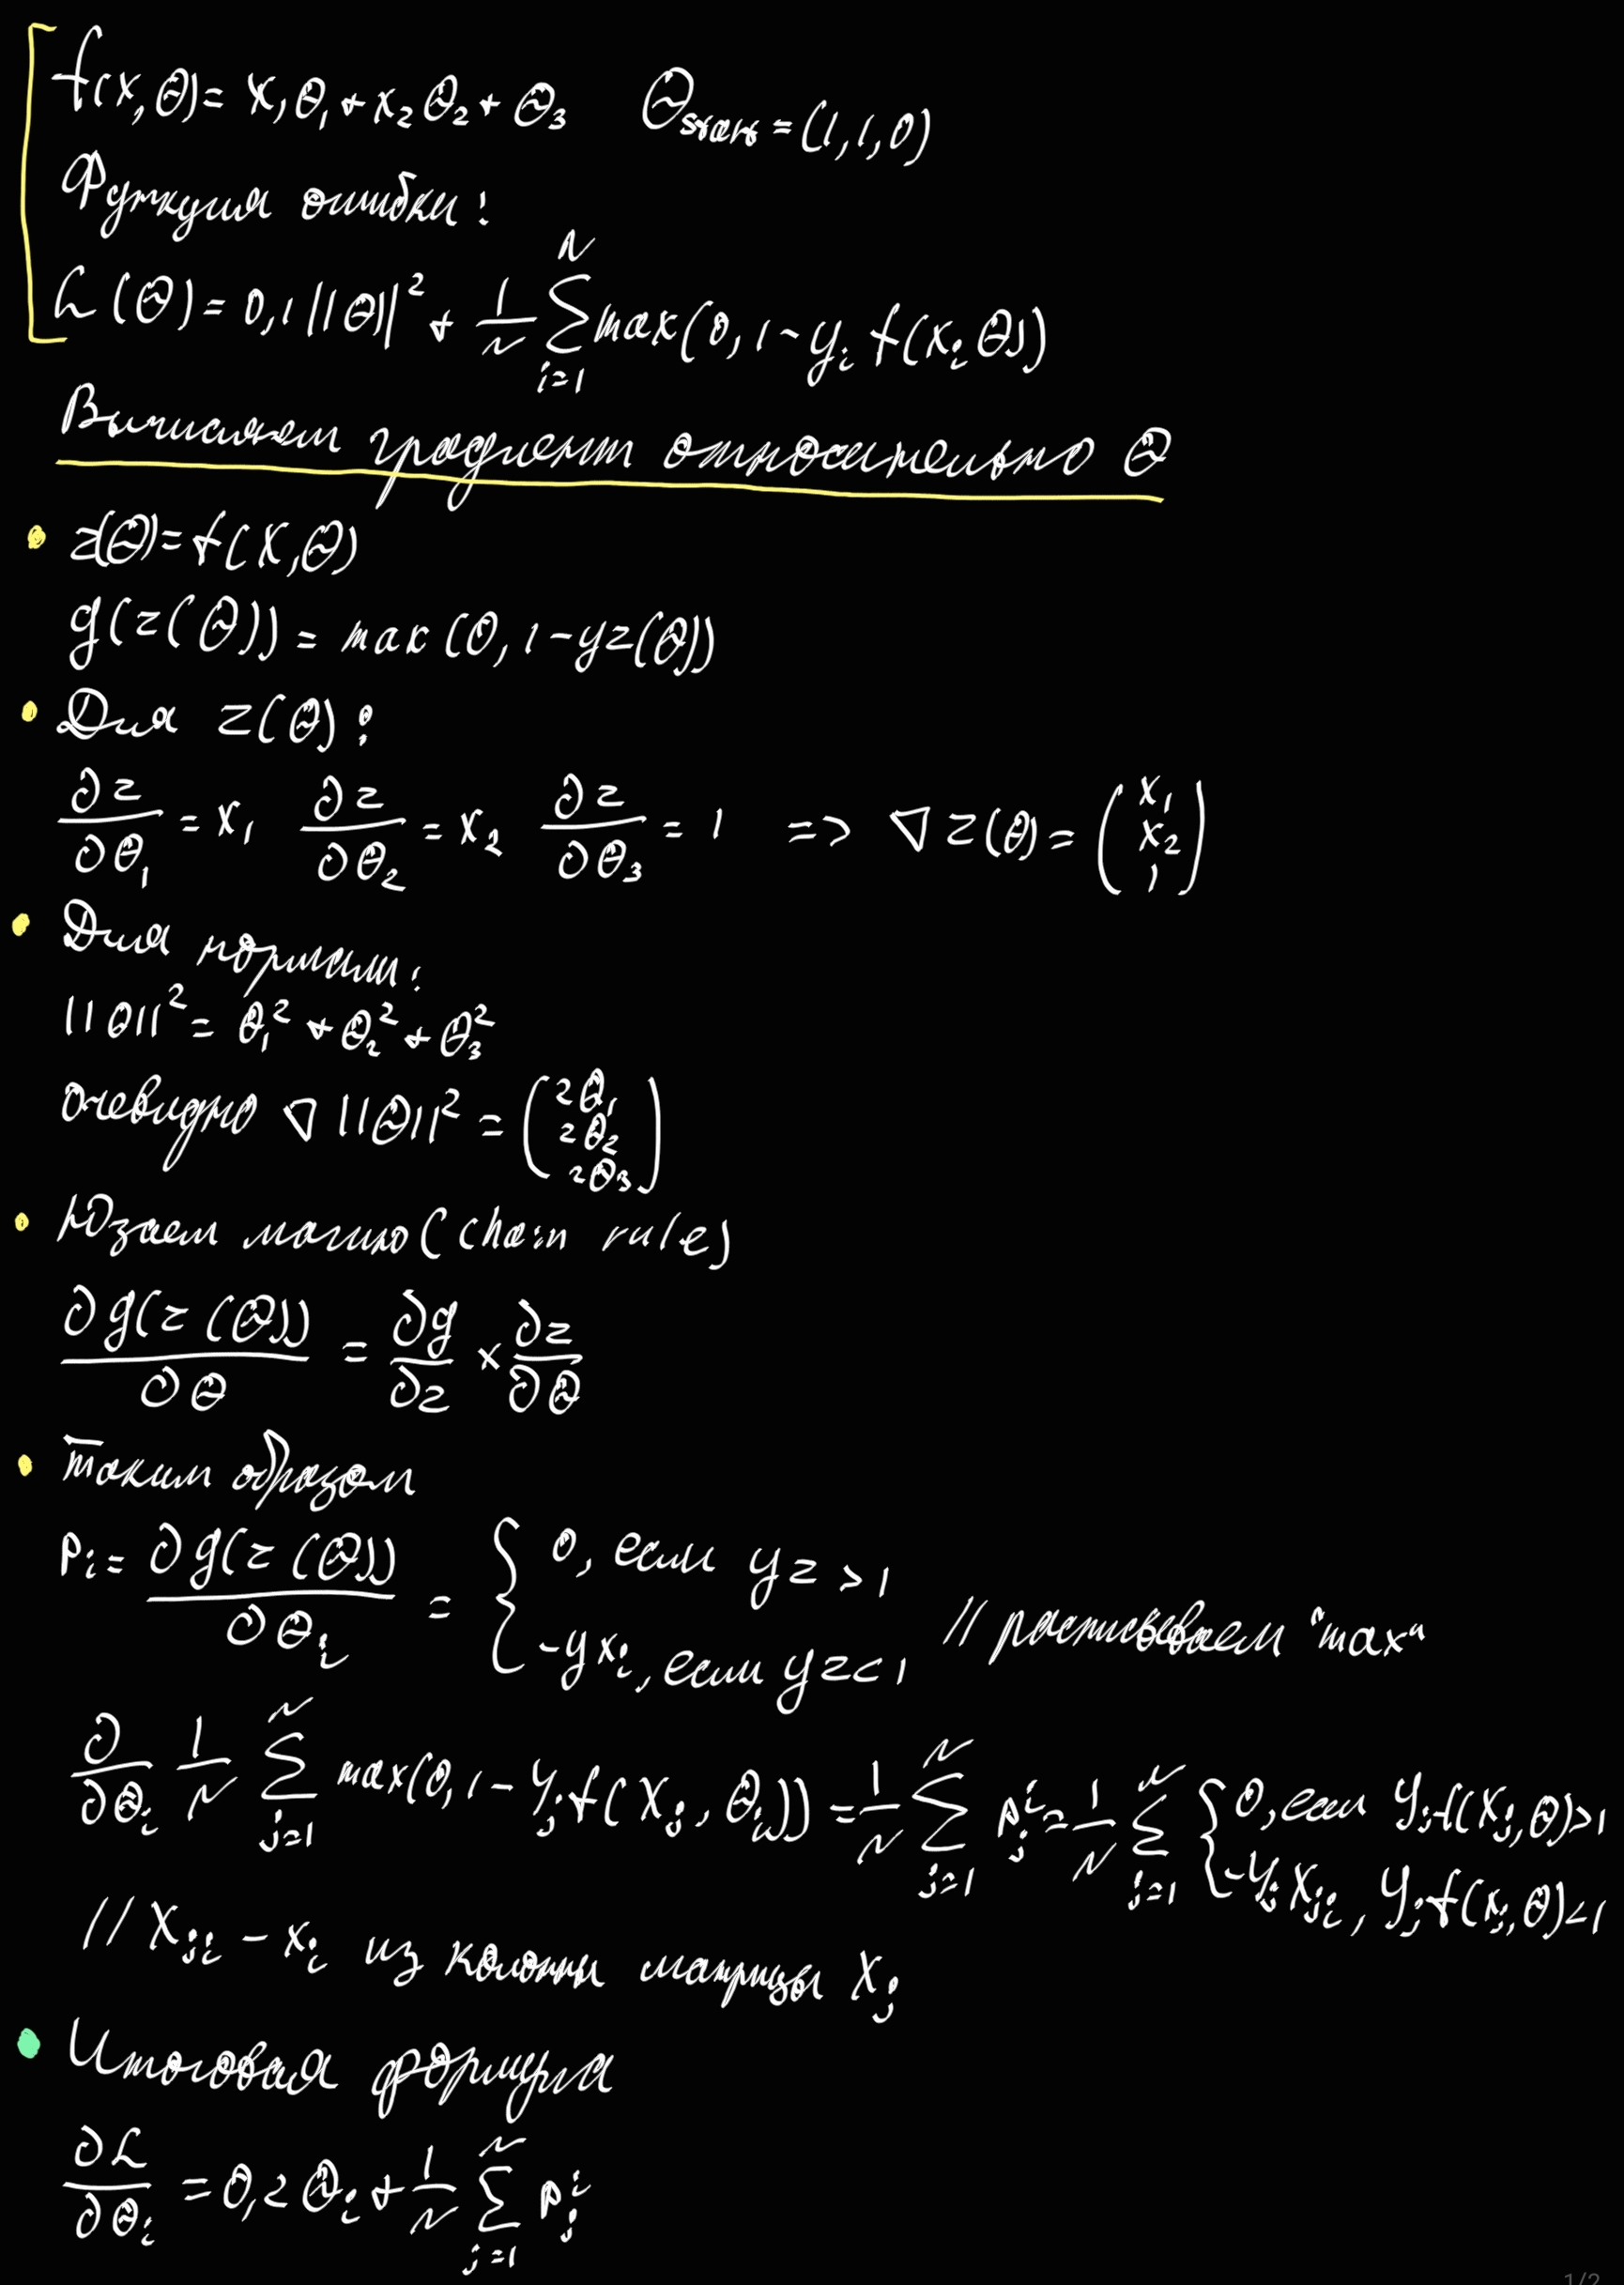

###Реализуем градиентный спуск

In [ ]:
def step(X, Y, theta, lr):
  gradient = np.zeros(3)
  for i in range(len(theta)):
    gradient[i] = 0.2 * theta[i]
    N = len(X)
    for j in range(N):
      summ_maxx = 0
      if (Y[j] * f(X[j], theta) < 1):
        summ_maxx += Y[j] * X[j][i]
      gradient[i] -= (1/N) * summ_maxx
  return lr * gradient

def grad_descent(X, Y, theta, steps=1000, lr=0.1):
  for _ in range(steps):
    theta -= step(X, Y, theta, lr)

###Выводим ответ

In [ ]:
grad_descent(X, Y, theta)
print("Theta:", theta)
print("Prediction:", [f(X[i], theta) for i in range(5)])
print("Loss:", loss(X, Y, theta))

with open("submission.yaml", "w") as fp:
    ym.safe_dump({"tasks": [{"task1": {"answer": theta.tolist()}}]}, fp)